### Notebook para el análisis de las 3 principales causas de muerte y 3 estados con mayor incidencia, en los registros “Estadísticas Vitales. Mortalidad, Defunciones Generales 2017” del INEGI


- La información los registros de causas de muerte en el 2017 se obtuvieron de INEGI en https://www.inegi.org.mx/rnm/index.php/catalog/407
- El catálogo de entidades se descargó de https://www.inegi.org.mx/contenidos/programas/enpl/2006/doc/catalogo_entidades.xlsx


### Librerías

In [82]:
import pandas as pd
import matplotlib.pyplot as plt


### Carga de datos

In [83]:
#Carga de datos

#Datos de mortalidad
datos_mortalidad = pd.read_csv('./mod4/conjunto_de_datos_defunciones_generales_2017.CSV')

#Muestra las primeras filas 
datos_mortalidad.head()


,ent_regis,mun_regis,ent_resid,mun_resid,tloc_resid,loc_resid,ent_ocurr,mun_ocurr,tloc_ocurr,loc_ocurr,...,anio_cert,maternas,lengua,cond_act,par_agre,ent_ocules,mun_ocules,loc_ocules,razon_m,dis_re_oax
0,1,1,1,1,15,1,1,1,15,1,...,2017,NaN,9,2,88,88,888,8888,0,999
1,1,9,1,9,1,16,1,9,1,16,...,2017,NaN,9,2,88,88,888,8888,0,999
2,1,1,1,1,15,1,1,1,15,1,...,2017,NaN,9,1,88,88,888,8888,0,999
3,1,6,1,6,8,1,1,6,8,1,...,2016,NaN,2,2,88,88,888,8888,0,999
4,1,1,1,1,15,1,1,1,15,1,...,2016,NaN,9,1,88,88,888,8888,0,999


In [84]:
#Catálogo de entidades

entidades= pd.read_csv('./mod4/catalogo_entidades.csv')

#Muestra las primeras filas del dataframe para revisar los datos
entidades.head()


,CLAVE ENTIDAD,NOMBRE ENTIDAD
0,1,Aguascalientes
1,2,Baja California
2,3,Baja California Sur
3,4,Campeche
4,5,Coahuila de Zaragoza


In [85]:
#Catálogo de causa de fallecimiento

causa = pd.read_csv('./mod4/decatcausa.csv', encoding='latin1')

#Muestra las primeras filas 
causa.head()


,CVE,DESCRIP
0,A000,"Cólera debido a Vibrio cholerae 01, biotipo ch..."
1,A001,"Cólera debido a Vibrio cholerae 01, biotipo el..."
2,A009,"Cólera, no especificado"
3,A010,Fiebre tifoidea
4,A011,Fiebre paratifoidea A


### Preprocesamiento de datos

In [86]:
#Seleccionamos las dos columnas de interés del dataframe datos_mortalidad

#Seleccionar solo las columnas 'ent_ocurr' y 'causa_def'
datos_interes = datos_mortalidad[['ent_ocurr', 'causa_def']]

#Mostrar las primeras filas del nuevo dataframe
datos_interes.head()

,ent_ocurr,causa_def
0,1,I679
1,1,I64X
2,1,E112
3,1,X590
4,1,I251


In [87]:
#Unimos los catálogos

#Se une el dataframe 'datos_interes' con el catálogo de entidades
datos_con_entidades = pd.merge(datos_interes, entidades, how='left', 
                               left_on='ent_ocurr', right_on='CLAVE ENTIDAD')

#Se cambia el nombre de la columna
datos_con_entidades = datos_con_entidades.rename(columns={'NOMBRE ENTIDAD': 'nombre_entidad'})

#Se une el dataframe datos_con_entidades on el catálogo de causas de defunción
datos_finales = pd.merge(datos_con_entidades, causa, how='left', left_on='causa_def', right_on='CVE')

#Se ajusta el nombre de las columnas
datos_finales = datos_finales.rename(columns={'DESCRIP': 'descripcion_causa_def'})

#Nos quedamos con las columnas que interesan
datos_finales = datos_finales[['ent_ocurr', 'nombre_entidad', 'causa_def', 'descripcion_causa_def']]

#Se muestran las primeras filas
datos_finales.head(10)


,ent_ocurr,nombre_entidad,causa_def,descripcion_causa_def
0,1,Aguascalientes,I679,"Enfermedad cerebrovascular, no especificada"
1,1,Aguascalientes,I64X,"Accidente vascular encefálico agudo, no especi..."
2,1,Aguascalientes,E112,"Diabetes mellitus no insulinodependiente, con ..."
3,1,Aguascalientes,X590,Exposición a factores no especificados que cau...
4,1,Aguascalientes,I251,Enfermedad aterosclerótica del corazón
5,1,Aguascalientes,N009,"Síndrome nefrítico agudo, no especificada"
6,1,Aguascalientes,E129,"Diabetes mellitus asociada con desnutrición, s..."
7,1,Aguascalientes,M623,Síndrome de inmovilidad (parapléjico)
8,1,Aguascalientes,C259,"Tumor maligno del páncreas, parte no especificada"
9,1,Aguascalientes,K631,Perforación del intestino (no traumática)


### Identificar las principales causas de muerte

In [88]:
#Se cuentan las ocurrencias de cada causa de defunción y se seleccionan las tres más comunes
top_causas_clave = datos_finales['causa_def'].value_counts().head(3)
print("Las tres principales causas de muerte son (por clave):")
print(top_causas_clave)

Las tres principales causas de muerte son (por clave):
I219    92555
E119    31077
E112    27620
Name: causa_def, dtype: int64


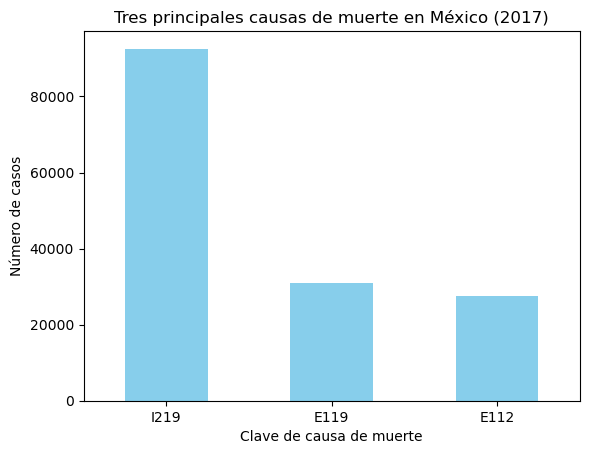

Causas de muerte:

   causa_def                              descripcion_causa_def
2       E112  Diabetes mellitus no insulinodependiente, con ...
14      E119  Diabetes mellitus no insulinodependiente, sin ...
16      I219  Infarto agudo del miocardio, sin otra especifi...


In [89]:
#Se procede a graficar la información 
top_causas_clave.plot(kind='bar', color='skyblue')
plt.title('Tres principales causas de muerte en México (2017)')
plt.xlabel('Clave de causa de muerte')
plt.ylabel('Número de casos')
plt.xticks(rotation=0, ha='center')
plt.show()

#Se obtienen las descripciones de las claves
descripciones_top_causas = datos_finales[datos_finales['causa_def'].isin(top_causas_clave.index)][['causa_def', 'descripcion_causa_def']].drop_duplicates()
print("Causas de muerte:\n")
print(descripciones_top_causas)


### Se identifican las tres entidades con mayor incidencia

In [90]:
for causa in top_causas.index:
    print(f"\nCausa de muerte: {causa}")
    datos_causa = datos_finales[datos_finales['descripcion_causa_def'] == causa]
    top_estados = datos_causa['nombre_entidad'].value_counts().head(3)
    print("Estados con mayor incidencia:")
    print(top_estados)


Causa de muerte: Infarto agudo del miocardio, sin otra especificación
Estados con mayor incidencia:
Ciudad de México                   10888
Estado de México                    9825
Veracruz de Ignacio de la Llave     7444
Name: nombre_entidad, dtype: int64

Causa de muerte: Diabetes mellitus no insulinodependiente, sin mención de complicación
Estados con mayor incidencia:
Ciudad de México                   3672
Estado de México                   3386
Veracruz de Ignacio de la Llave    2093
Name: nombre_entidad, dtype: int64

Causa de muerte: Diabetes mellitus no insulinodependiente, con complicaciones renales
Estados con mayor incidencia:
Estado de México                   4035
Ciudad de México                   2752
Veracruz de Ignacio de la Llave    2410
Name: nombre_entidad, dtype: int64


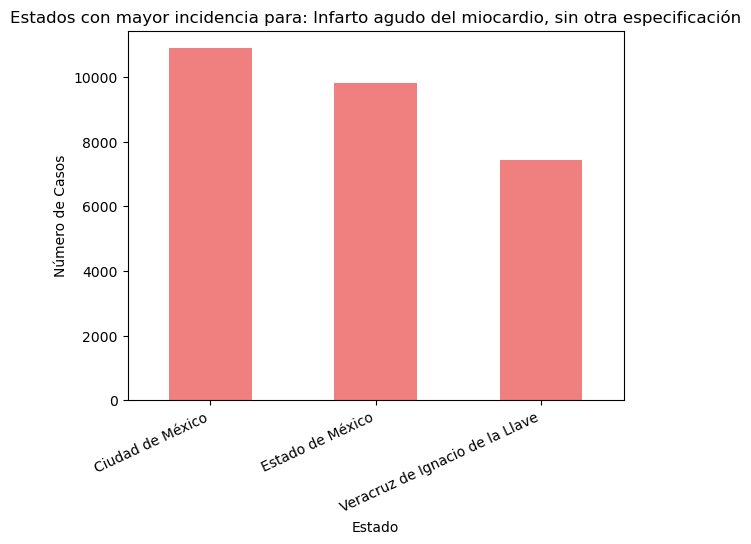

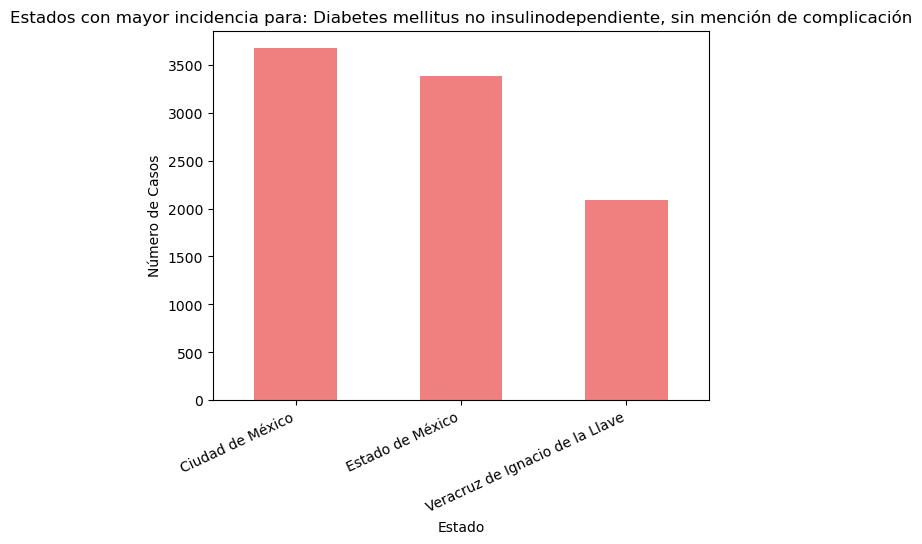

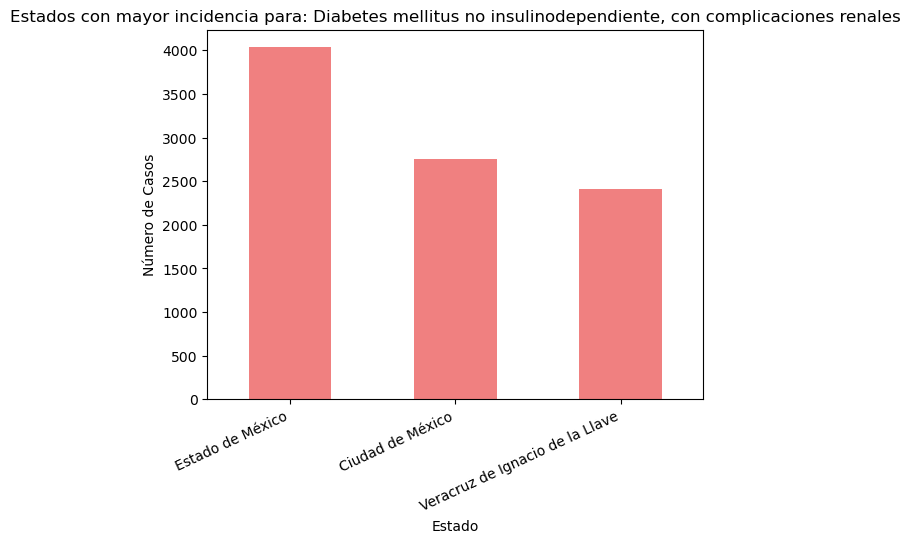

In [91]:
#Se grafica la información

for causa in top_causas.index:
    #print(f"Causa de muerte: {causa}")
    datos_causa = datos_finales[datos_finales['descripcion_causa_def'] == causa]
    top_estados = datos_causa['nombre_entidad'].value_counts().head(3)
    
    # Graficar los estados con mayor incidencia para cada causa
    top_estados.plot(kind='bar', color='lightcoral')
    plt.title(f'Estados con mayor incidencia para: {causa}')
    plt.xlabel('Estado')
    plt.ylabel('Número de Casos')
    plt.xticks(rotation=25, ha='right')
    plt.show()
